In [49]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [50]:
# Read Whole Dataset
df= pd.read_csv('All_Data_Clean.csv')

In [51]:
# Display whole dataset
df.head()

,ACYEAR,F_INSTID,F_ZDLEV501,F_XQMODE01,F_XAGRPJ01,F_SEXID,f_XJACS01_1level,F_XCL6SS01,F_XSTUDIS01,F_XQUALENT01,F_TARIFF_numeric,F_XACTIV02,F_SOC,F_XSIC202
0,Thirdteen,SRUC,4,Full-time,17 years and under,Male,N,7,J,F,11,Full-time work,Other managers and proprietors,Crop and animal production
1,Thirdteen,SRUC,4,Full-time,17 years and under,Male,N,7,J,I,22,Full-time work,Other managers and proprietors,Crop and animal production
2,Thirdteen,Harper Adams University,4,Full-time,18-20 years,Male,N,7,J,F,15,Full-time work,Other managers and proprietors,Crop and animal production
3,Thirdteen,Harper Adams University,4,Full-time,18-20 years,Female,L,7,J,F,17,Full-time work,Other managers and proprietors,Crop and animal production
4,Thirdteen,University of Plymouth,4,Full-time,18-20 years,Male,N,7,J,F,23,Full-time work,"Science, research, engineering and technology ...",Crop and animal production


In [52]:
# Convert all variables to the category before applying one hote encoding. 
# Category variable is for categorical variables.
df = df.astype('category')

In [53]:
# Check your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270934 entries, 0 to 270933
Data columns (total 14 columns):
ACYEAR              270934 non-null category
F_INSTID            270934 non-null category
F_ZDLEV501          270934 non-null category
F_XQMODE01          270934 non-null category
F_XAGRPJ01          270934 non-null category
F_SEXID             270934 non-null category
f_XJACS01_1level    270934 non-null category
F_XCL6SS01          270934 non-null category
F_XSTUDIS01         270934 non-null category
F_XQUALENT01        270934 non-null category
F_TARIFF_numeric    270934 non-null category
F_XACTIV02          270934 non-null category
F_SOC               270934 non-null category
F_XSIC202           270934 non-null category
dtypes: category(14)
memory usage: 3.9 MB


In [54]:
# Create the data set with data for y, by dropping targetted columns
df5 = df.drop(['F_XACTIV02','F_SOC','F_XSIC202'], axis=1)


In [55]:
df1 = pd.read_csv('All_Data_Clean.csv')

In [56]:
# Create the data set with data for x, by dropping targetted columns
#df2 = df1.drop(['ACYEAR','F_INSTID','F_ZDLEV501','F_XQMODE01','F_XAGRPJ01','F_SEXID','f_XJACS01_1level','f_XJACS01_1level',
             #'F_XCL6SS01','F_XSTUDIS01','F_XQUALENT01','F_TARIFF_numeric'], axis= 1)
#df_activity = df.drop(['ACYEAR','F_INSTID','F_ZDLEV501','F_XQMODE01','F_XAGRPJ01','F_SEXID','f_XJACS01_1level','f_XJACS01_1level',
             #'F_XCL6SS01','F_XSTUDIS01','F_XQUALENT01','F_TARIFF_numeric','F_SOC','F_XSIC202'], axis= 1)
df_job = df.drop(['ACYEAR','F_INSTID','F_ZDLEV501','F_XQMODE01','F_XAGRPJ01','F_SEXID','f_XJACS01_1level','f_XJACS01_1level',
             'F_XCL6SS01','F_XSTUDIS01','F_XQUALENT01','F_TARIFF_numeric','F_XACTIV02','F_XSIC202'], axis= 1)
#df_industry = df.drop(['ACYEAR','F_INSTID','F_ZDLEV501','F_XQMODE01','F_XAGRPJ01','F_SEXID','f_XJACS01_1level','f_XJACS01_1level',
             #'F_XCL6SS01','F_XSTUDIS01','F_XQUALENT01','F_TARIFF_numeric','F_XACTIV02','F_SOC',], axis= 1)

In [57]:
# Check if you selected proper data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270934 entries, 0 to 270933
Data columns (total 3 columns):
F_XACTIV02    270934 non-null object
F_SOC         270934 non-null object
F_XSIC202     270934 non-null object
dtypes: object(3)
memory usage: 6.2+ MB


In [58]:
#df_activity.info()
#df_job.info()
#df_industry.info()

In [59]:
# Create a y dataset by converting df2 to the dummies (one-hot)
#y = pd.get_dummies(df2)
# Creat a dummies for just activity
#y = pd.get_dummies(df_activity)
# Create a dummies for just job
y = pd.get_dummies(df_job)
# Create a dummies for just Industry
#y = pd.get_dummies(df_industry)

In [60]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270934 entries, 0 to 270933
Data columns (total 24 columns):
F_SOC_Administrative occupations                                     270934 non-null uint8
F_SOC_Business and public service associate professionals            270934 non-null uint8
F_SOC_Business, media and public service professionals               270934 non-null uint8
F_SOC_Caring personal service occupations                            270934 non-null uint8
F_SOC_Corporate managers and directors                               270934 non-null uint8
F_SOC_Culture, media and sports occupations                          270934 non-null uint8
F_SOC_Customer service occupations                                   270934 non-null uint8
F_SOC_Elementary administration and service occupations              270934 non-null uint8
F_SOC_Elementary trades and related occupations                      270934 non-null uint8
F_SOC_Health and social care associate professionals                 2

In [33]:
# Drop Other form the Activity data set
#y = y.drop(['F_XACTIV02_Other'], axis=1)

In [61]:
# Drop unknown form the Job data set
y = y.drop(['F_SOC_Uknown'], axis=1)

In [62]:
# drop F_XSIC202_Not known/ not applicable from industry dataset
#y = y.drop(['F_XSIC202_Not known/ not applicable'], axis=1)

In [63]:
# drop F_XSIC202_Not known/ not applicable and F_SOC_Uknown from all 3 dependent from industry dataset
#y = y.drop(['F_XSIC202_Not known/ not applicable','F_SOC_Uknown','F_XACTIV02_Other'], axis=1)

In [64]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270934 entries, 0 to 270933
Data columns (total 23 columns):
F_SOC_Administrative occupations                                     270934 non-null uint8
F_SOC_Business and public service associate professionals            270934 non-null uint8
F_SOC_Business, media and public service professionals               270934 non-null uint8
F_SOC_Caring personal service occupations                            270934 non-null uint8
F_SOC_Corporate managers and directors                               270934 non-null uint8
F_SOC_Culture, media and sports occupations                          270934 non-null uint8
F_SOC_Customer service occupations                                   270934 non-null uint8
F_SOC_Elementary administration and service occupations              270934 non-null uint8
F_SOC_Elementary trades and related occupations                      270934 non-null uint8
F_SOC_Health and social care associate professionals                 2

In [65]:
# Save the y data in the csv file
#y.to_csv('onehote_dependent_RandomF.csv')

In [66]:
# Read the activity
#y.to_csv('onehote_dependent_Activity.csv')

In [67]:
#y.to_csv('onehote_dependent_Job.csv')

In [68]:
#y.to_csv('onehote_dependent_Industry.csv')

In [69]:
# Read the X data from the csv file
#y = pd.read_csv('onehote_dependent_RandomF.csv', index_col=False)
#y = pd.read_csv('onehote_dependent_Activity.csv', index_col=False)
#y = pd.read_csv('onehote_dependent_Job.csv', index_col=False)
#y = pd.read_csv('onehote_dependent_Industry.csv', index_col=False)

In [70]:
# Display the y data
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270934 entries, 0 to 270933
Data columns (total 23 columns):
F_SOC_Administrative occupations                                     270934 non-null uint8
F_SOC_Business and public service associate professionals            270934 non-null uint8
F_SOC_Business, media and public service professionals               270934 non-null uint8
F_SOC_Caring personal service occupations                            270934 non-null uint8
F_SOC_Corporate managers and directors                               270934 non-null uint8
F_SOC_Culture, media and sports occupations                          270934 non-null uint8
F_SOC_Customer service occupations                                   270934 non-null uint8
F_SOC_Elementary administration and service occupations              270934 non-null uint8
F_SOC_Elementary trades and related occupations                      270934 non-null uint8
F_SOC_Health and social care associate professionals                 2

In [71]:
# Display the df5 data
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270934 entries, 0 to 270933
Data columns (total 11 columns):
ACYEAR              270934 non-null category
F_INSTID            270934 non-null category
F_ZDLEV501          270934 non-null category
F_XQMODE01          270934 non-null category
F_XAGRPJ01          270934 non-null category
F_SEXID             270934 non-null category
f_XJACS01_1level    270934 non-null category
F_XCL6SS01          270934 non-null category
F_XSTUDIS01         270934 non-null category
F_XQUALENT01        270934 non-null category
F_TARIFF_numeric    270934 non-null category
dtypes: category(11)
memory usage: 3.1 MB


In [72]:
X = pd.get_dummies(df5)

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270934 entries, 0 to 270933
Columns: 248 entries, ACYEAR_Fiveteen to F_TARIFF_numeric_23
dtypes: uint8(248)
memory usage: 64.1 MB


In [74]:
# Save the y data in the csv file
#X.to_csv('onehote_dependent_RandomF.csv')


In [75]:
# read the y dataset
#X = pd.read_csv('onehote_dependent_RandomF.csv', index_col=False)


C:\Users\4kadut15\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


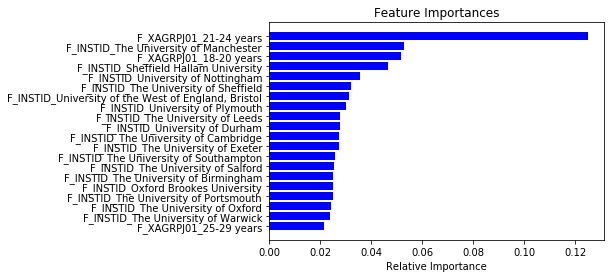

In [76]:
# =============================================================================
# RANDOM FOREST
# =============================================================================
model = RandomForestRegressor(random_state=1, max_depth=20)
# Rum the model
model.fit(X,y)
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # top features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

C:\Users\4kadut15\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.09835193e-02 1.05428721e-02 1.13014908e-02 1.09592704e-02
 1.06616203e-02 3.10076603e-03 1.80534744e-03 3.27155299e-03
 1.41989954e-03 2.62475888e-03 2.23421191e-03 1.44000853e-03
 3.32824309e-03 1.39934665e-03 3.18116232e-03 2.51468061e-03
 2.35761207e-03 2.93702906e-03 2.16948388e-03 2.95046251e-03
 2.08847260e-03 9.54943604e-04 2.24993584e-04 3.09727125e-03
 3.19208292e-04 4.75984933e-03 2.19982340e-03 2.27570658e-03
 1.45561356e-03 2.06140824e-03 1.12074475e-03 2.61212060e-03
 2.37553352e-03 4.71907298e-05 4.51360991e-04 1.02921823e-03
 1.52712590e-03 3.69125957e-04 1.04014017e-03 6.76021872e-04
 2.15550757e-03 2.97981220e-03 4.06501531e-03 7.69128578e-04
 3.45330693e-03 1.04707400e-03 1.35012718e-03 3.12235557e-03
 8.57926342e-05 8.27054059e-05 3.09878016e-03 1.19131532e-03
 2.99277060e-04 3.35441421e-03 2.26986100e-03 2.06508159e-03
 2.32638615e-03 1.12100087e-03 1.23189891e-03 3.33654591e-03
 7.34286534e-04 1.41718127e-03 2.30175558e-03 2.51157725e-03
 8.52773700e-04 1.322114

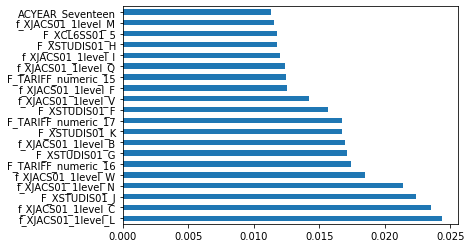

In [208]:
# =============================================================================
# Feature Importance - Extra Tree Classifier 
# =============================================================================
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [77]:
# =============================================================================
# Univariate Selection
# =============================================================================
df.info()
#apply SelectKBest class to extract top 40 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(40,'Score'))  #print 40 best features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270934 entries, 0 to 270933
Data columns (total 14 columns):
ACYEAR              270934 non-null category
F_INSTID            270934 non-null category
F_ZDLEV501          270934 non-null category
F_XQMODE01          270934 non-null category
F_XAGRPJ01          270934 non-null category
F_SEXID             270934 non-null category
f_XJACS01_1level    270934 non-null category
F_XCL6SS01          270934 non-null category
F_XSTUDIS01         270934 non-null category
F_XQUALENT01        270934 non-null category
F_TARIFF_numeric    270934 non-null category
F_XACTIV02          270934 non-null category
F_SOC               270934 non-null category
F_XSIC202           270934 non-null category
dtypes: category(14)
memory usage: 3.9 MB


KeyboardInterrupt: 